In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from skimage import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**By Built in KMeans Function**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


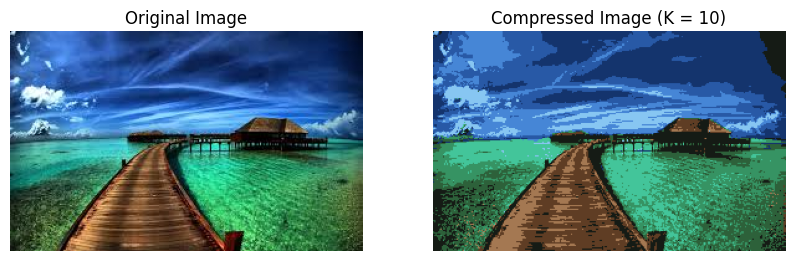

In [3]:

image = io.imread('/content/drive/MyDrive/wallpaper.jpg')


pixels = image.reshape(-1, 3)

K = 10


kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(pixels)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


compressed_image = centroids[labels].reshape(image.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Compressed Image (K = {})".format(K))
plt.imshow(compressed_image.astype(np.uint8))
plt.axis('off')

plt.show()


**Step by Step**

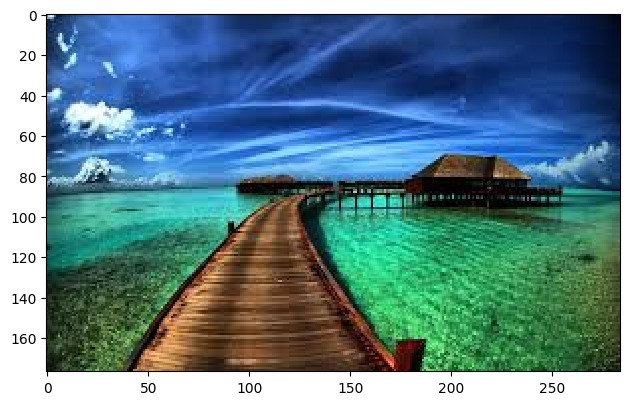

In [4]:
from skimage import io
import numpy as np
import numpy.matlib

image = io.imread('/content/drive/MyDrive/wallpaper.jpg')
io.imshow(image)
io.show()

In [5]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [6]:
K = 16
max_iters = 50 #number of times the k-mean should run

In [7]:
import random
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [8]:
def closest_centr(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [9]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [10]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centr(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [11]:
initial_centroids = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

(16, 3)
(50268,)


In [12]:
idx = closest_centr(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
print(np.shape(X_recovered))

(50268, 3)
(177, 284, 3)


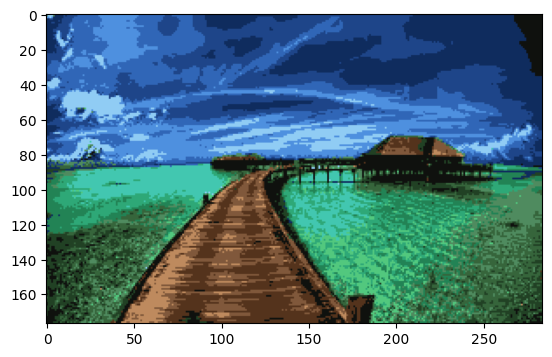

In [13]:
plt.imshow(X_recovered)
plt.show()

In [14]:
from PIL import Image

image = Image.fromarray(np.uint8(X_recovered))
image.save('/content/drive/MyDrive/wallpaper1.jpg')

In [15]:
image_compressed = io.imread('/content/drive/MyDrive/wallpaper1.jpg')


In [18]:
import os
info = os.stat('/content/drive/MyDrive/wallpaper.jpg')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info = os.stat('/content/drive/MyDrive/wallpaper1.jpg')
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")

size of image before running K-mean algorithm:  10.4873046875 KB
size of image after running K-mean algorithm:  1.4560546875 KB


In [19]:
import sys

image_size_kb = sys.getsizeof(X_recovered) / 1024

print("Size of image after running K-means algorithm:", image_size_kb, "KB")

Size of image after running K-means algorithm: 0.140625 KB
